In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
dataFrame=pd.read_csv("Classified Data",index_col=0)

In [11]:
data=dataFrame.copy()

In [12]:
data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [13]:
data.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [28]:
data_transform=pd.DataFrame(scaler.fit_transform(data.drop('TARGET CLASS',axis=1)),columns=data.columns[:-1])

In [29]:
data_transform

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


   # Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(data_transform,data['TARGET CLASS'],test_size=0.3)

In [67]:
list(y_test)[5]


1

# KNN


In [34]:
from sklearn.neighbors import KNeighborsClassifier

### n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.

###  metric='minkowski': This is the default parameter and it decides the distance between the points.

###  p=2: It is equivalent to the standard Euclidean metric.


In [36]:

knn=KNeighborsClassifier(n_neighbors=1)

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [42]:
y_predict=knn.predict(X_test)

In [65]:
y_predict

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0], d

# Prediction

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

confusion_matrix(y_predict,y_test)

In [47]:
accuracy_score(y_predict,y_test)

0.9

In [97]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       150
           1       0.96      0.87      0.91       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Error Rate

##  we can find K value using error rate(K value where error is minimum) or accuraccy (K value maximum)

In [102]:
error_list=[]

for i in range(1,46):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_predict=knn.predict(X_test)
    
    error_list.append(np.mean(y_predict!= y_test))

In [103]:
error_list

[0.1,
 0.10333333333333333,
 0.08666666666666667,
 0.07666666666666666,
 0.09666666666666666,
 0.08333333333333333,
 0.08666666666666667,
 0.08,
 0.08,
 0.08,
 0.08333333333333333,
 0.08333333333333333,
 0.08,
 0.07666666666666666,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.07,
 0.08,
 0.07333333333333333,
 0.07666666666666666,
 0.07333333333333333,
 0.07666666666666666,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.08,
 0.07333333333333333,
 0.07333333333333333,
 0.08,
 0.08,
 0.08,
 0.08666666666666667,
 0.08333333333333333,
 0.08666666666666667,
 0.08333333333333333,
 0.08666666666666667,
 0.08,
 0.08,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.08,
 0.08333333333333333]

Text(0, 0.5, 'Error Rate')

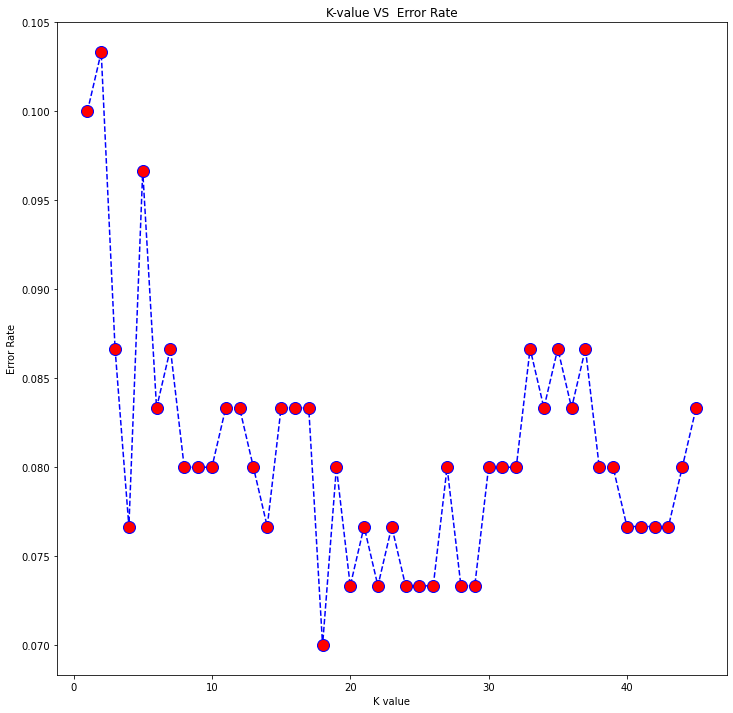

In [104]:
plt.figure(figsize=(12,12))
plt.plot(range(1,46),error_list,color='blue',marker='o',linestyle='dashed',markerfacecolor="red",markersize=12)
plt.title("K-value VS  Error Rate")
plt.xlabel("K value")
plt.ylabel("Error Rate")

# Accuraccy

In [105]:
accuracy=[]

for i in range(1,46):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_predict=knn.predict(X_test)
    
    accuracy.append(accuracy_score(y_predict,y_test))

In [106]:
accuracy

[0.9,
 0.8966666666666666,
 0.9133333333333333,
 0.9233333333333333,
 0.9033333333333333,
 0.9166666666666666,
 0.9133333333333333,
 0.92,
 0.92,
 0.92,
 0.9166666666666666,
 0.9166666666666666,
 0.92,
 0.9233333333333333,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.93,
 0.92,
 0.9266666666666666,
 0.9233333333333333,
 0.9266666666666666,
 0.9233333333333333,
 0.9266666666666666,
 0.9266666666666666,
 0.9266666666666666,
 0.92,
 0.9266666666666666,
 0.9266666666666666,
 0.92,
 0.92,
 0.92,
 0.9133333333333333,
 0.9166666666666666,
 0.9133333333333333,
 0.9166666666666666,
 0.9133333333333333,
 0.92,
 0.92,
 0.9233333333333333,
 0.9233333333333333,
 0.9233333333333333,
 0.9233333333333333,
 0.92,
 0.9166666666666666]

Text(0, 0.5, 'Error Accuraccy')

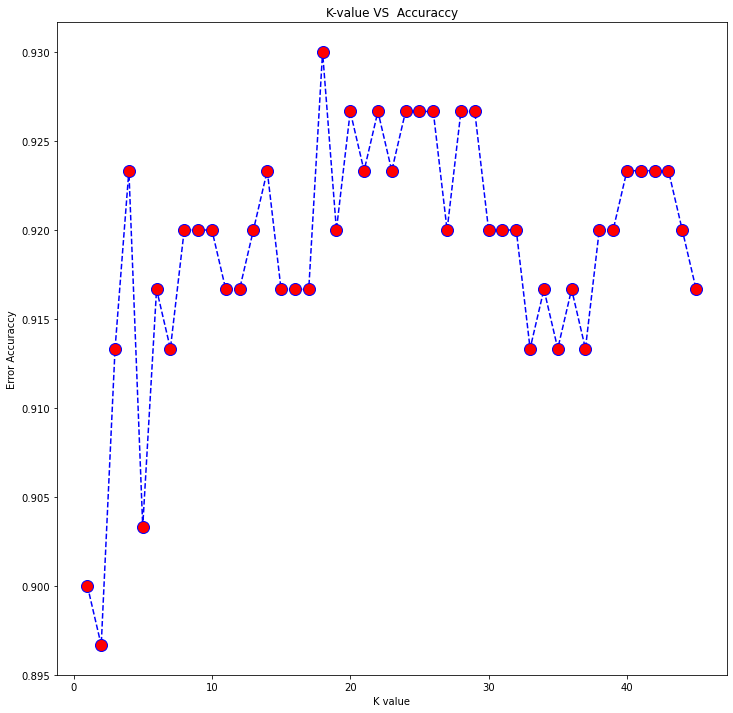

In [107]:
plt.figure(figsize=(12,12))
plt.plot(range(1,46),accuracy,color='blue',marker='o',linestyle='dashed',markerfacecolor="red",markersize=12)
plt.title("K-value VS  Accuraccy")
plt.xlabel("K value")
plt.ylabel("Error Accuraccy")

##  Considering K = 23

In [108]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)

In [109]:
accuracy_score(y_predict,y_test)

0.9233333333333333

In [110]:
confusion_matrix(y_predict,y_test)

array([[145,   5],
       [ 18, 132]], dtype=int64)

In [111]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       150
           1       0.96      0.88      0.92       150

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300

